# BUSINESS ANALYTICS OF A BIBYCLES COMPANY

# 1. Introduction

## Report goal
There is a small fictional cycling company that sells bicycles in different countries around the world. They would like to increase their revenue and improve their business. To do this, they provided a dataset with all their transactions in the years 2013-2014. This dataset includes product-level information about sales, profits, market segments, and geographic distribution.

The main idea is to use these details to gain new insights to create or improve the marketing and sales strategy.

Specifically, it will be analyze:
- the sales trends over time using a line chart to highlight seasonality or trends;
- the sales difference across regions using a heat map or bar chart;
- the top-selling products using visualization charts (pie chart or bar chart);
- the relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression.

## Database description
The database is composed by 700 rows and 16 columns:
- segment:
- country:
- product:
- discount band:
- unit sold:
- manufactoring price:
- sale price:
- gross sales:
- discount:
- sales:
- COGS:
- profit:
- date: 
- month number
- month name
- year


#### Packages

In [85]:
import plotly.express as px
import numpy as np


# 2. Loading and inspection of the dataset

Data import with API

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvaarya25/financials")

print("Path to dataset files:", path)

c:\Users\pzele\OneDrive\Počítač\IES\Data procesing in Python\FinalProject\FinalProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\pzele\.cache\kagglehub\datasets\atharvaarya25\financials\versions\1


In [5]:
import pandas as pd

df = pd.read_csv(f"{path}/Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


Dataset overview

In [6]:
# copy of the dataset
df_copy = df.copy(deep=True)

In [7]:
# number or rows and columns
df.shape

(700, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

# 3. Cleaning of the dataset

Cleaning the column names

In [9]:
# check the column names
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [10]:
# column names with anomalous spaces
columns_whiteSpaceName = df.columns[df.columns.str.startswith(" ") | df.columns.str.endswith(" ")]
columns_whiteSpaceName

Index([' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ',
       ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ',
       ' Profit ', ' Month Name '],
      dtype='object')

In [11]:
# remove white spaces
df.columns = df.columns.str.strip()

Cleaning the column values

In [12]:
# columns type
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

In [13]:
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014


In [14]:
# remove $ and space
columns_withDollar = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '')
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].apply(lambda x: x.strip())

df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,-,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,-,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,-,32670.00,21780.00,10890.00,01/06/2014,6,June,2014


In [15]:
# changing Discount column
df['Discounts'] = df['Discounts'].replace('-', 0)

In [16]:
# check again for unusual symbols
for col in columns_withDollar:
    print(f"Check column: {col}")
    print(df[col][df[col].str.contains(r'^\s*$|^-|^\$|\(|\)', na=False)].unique())

Check column: Units Sold
[]
Check column: Manufacturing Price
[]
Check column: Sale Price
[]
Check column: Gross Sales
[]
Check column: Discounts
[]
Check column: Sales
[]
Check column: COGS
[]
Check column: Profit
['-' '(4533.75)' '(3740.00)' '(2981.25)' '(1076.25)' '(880.00)'
 '(1008.75)' '(2217.50)' '(2380.00)' '(6887.50)' '(4968.75)' '(9375.00)'
 '(13173.75)' '(7826.25)' '(6168.75)' '(3727.50)' '(7700.00)' '(5570.00)'
 '(11606.25)' '(17481.25)' '(3543.75)' '(13187.50)' '(5481.25)'
 '(25841.25)' '(11115.00)' '(13530.00)' '(11970.00)' '(14370.00)'
 '(2557.50)' '(18967.50)' '(4342.50)' '(21358.75)' '(4847.50)'
 '(27693.75)' '(12538.75)' '(8286.25)' '(24160.00)' '(21560.00)'
 '(23870.00)' '(17808.75)' '(18663.75)' '(12787.50)' '(35262.50)'
 '(19687.50)' '(35550.00)' '(16142.50)' '(38046.25)' '(14918.75)'
 '(9116.25)' '(33522.50)' '(40617.50)' '(7590.00)']


In [17]:
(df['Profit']=='-').sum()
# there are only 5 values in Profit column with "-", they will be considered as NaN values

np.int64(5)

In [18]:
# change Profit column
df['Profit'] = df['Profit'].str.strip('()')
df['Profit'] = df['Profit'].replace('-', None)


In [19]:
# change column types
for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(float)

In [20]:
# Date column in date type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               695 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [22]:
df = df.dropna()

# change column types
for col in columns_withDollar:
    if df[col].dtype == 'float':
        df[col] = df[col].astype(int)

In [23]:
# controll of the values
round(df[columns_withDollar].describe(), 2)

# It seems not to be strange values, cleaning data completed

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
count,695.00,695.00,695.00,695.00,695.00,695.00,695.00,695.00
mean,1609.58,96.75,118.38,182791.32,13193.37,169597.38,145290.19,26544.08
std,867.79,108.61,137.27,255038.27,23037.42,237441.03,204428.18,41515.20
min,200.00,3.00,7.00,1799.00,0.00,1655.00,918.00,285.00
25%,905.00,5.00,12.00,17325.00,798.00,15851.00,7480.00,4013.00
50%,1545.00,10.00,20.00,37080.00,2559.00,34736.00,21980.00,11135.00
75%,2230.50,250.00,300.00,280850.00,16164.50,261575.00,245905.00,23918.50
max,4492.00,260.00,350.00,1207500.00,149677.00,1159200.00,950625.00,262200.00


# 4. Exploratory Data Analysis

In [24]:
df_copy2 = df.copy(deep=True)

In [25]:
# set Date column as index
df = df.set_index("Date")

In [26]:
df = df.drop(["Month Number", "Month Name", "Year"], axis=1)

Descriptive statistics

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

- categorical variables

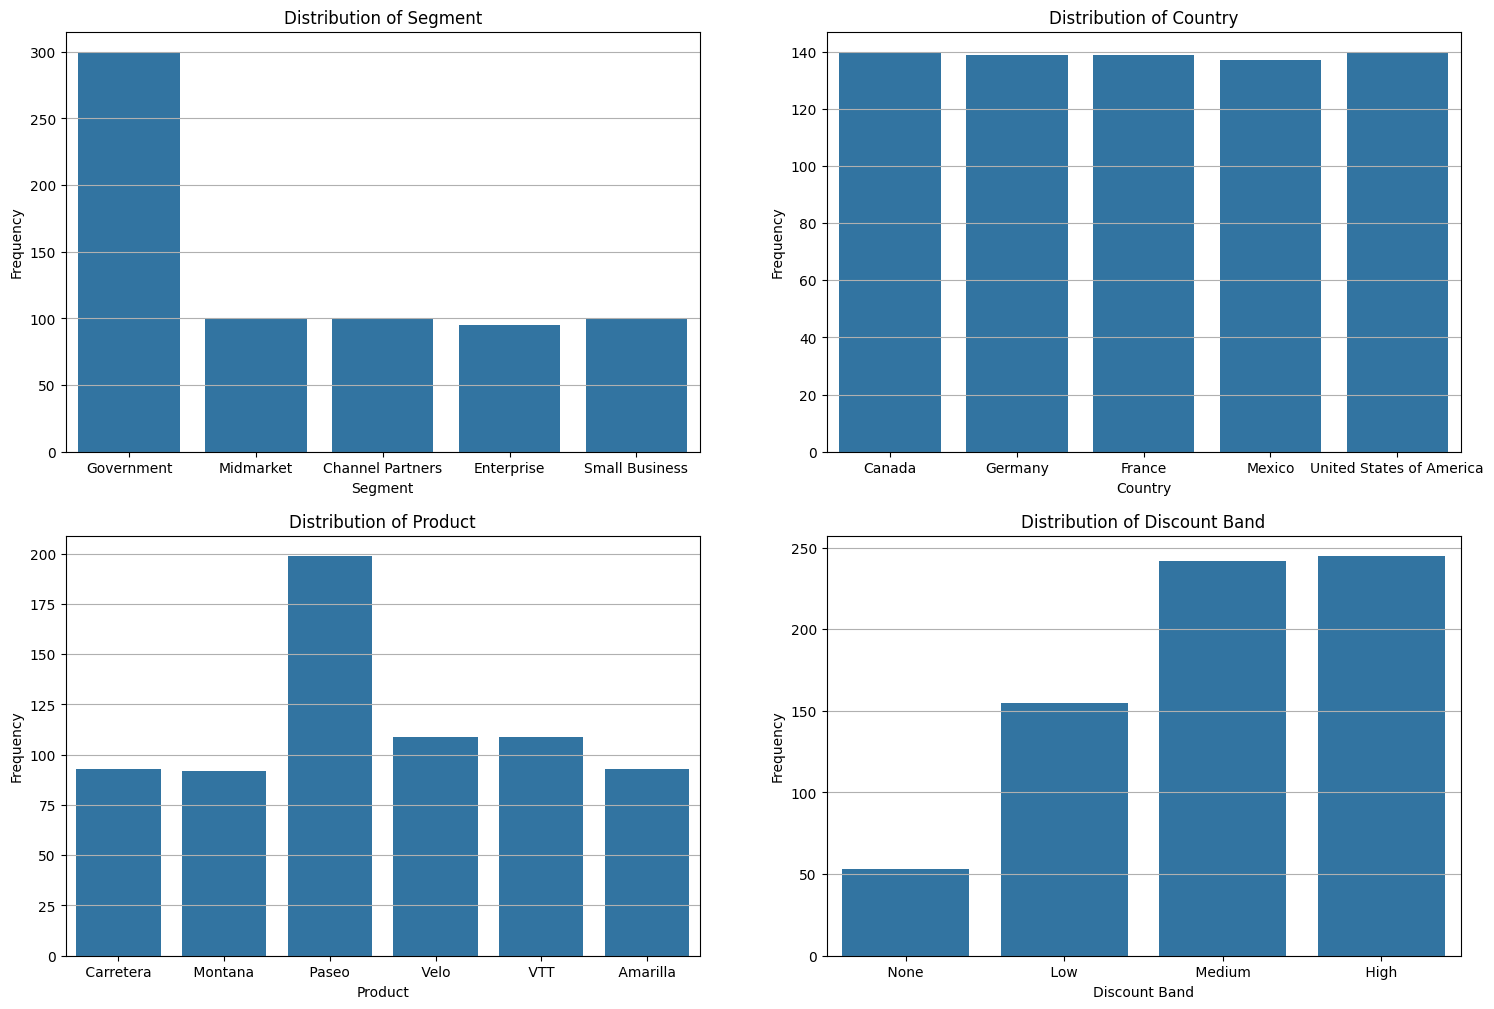

In [28]:
# selection of the categorical variables
categorical_columns = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

# barplot for the categorical vars
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

In [29]:
# percentage table
def percentageTable(col): 
    percentage = round(df[col].value_counts(normalize=True)*100, 2)
    
    table = pd.DataFrame({
        'Category': percentage.index,
        'Percentage (%)': percentage.values
        })
    print(f"Variable {col}")
    print(table.to_string(index=False))
    print("\n")

In [30]:
# Segment
percentageTable('Segment')

Variable Segment
        Category  Percentage (%)
      Government           43.17
       Midmarket           14.39
Channel Partners           14.39
  Small Business           14.39
      Enterprise           13.67




In [31]:
# Country
percentageTable('Country')

Variable Country
                Category  Percentage (%)
                  Canada           20.14
United States of America           20.14
                 Germany           20.00
                  France           20.00
                  Mexico           19.71




In [32]:
# Product
percentageTable('Product')

Variable Product
   Category  Percentage (%)
     Paseo            28.63
      Velo            15.68
       VTT            15.68
 Carretera            13.38
  Amarilla            13.38
   Montana            13.24




In [33]:
# Discount Band
percentageTable('Discount Band')

Variable Discount Band
Category  Percentage (%)
   High            35.25
 Medium            34.82
    Low            22.30
   None             7.63




- quantitative variables

In [34]:
# selection of the quantitative variables
numerical_columns = df.select_dtypes(include='number').columns

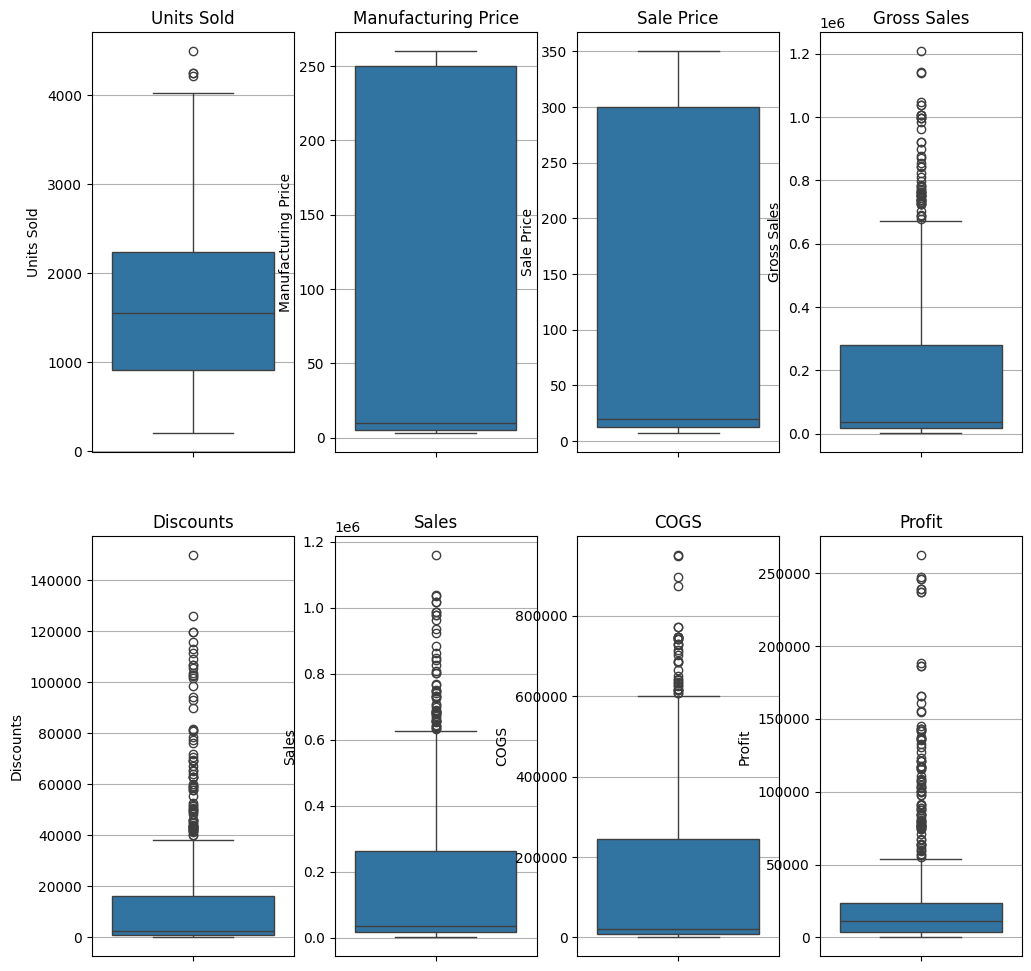

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.ravel()

#  boxlot of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Boxplot per la variabile corrente
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y')

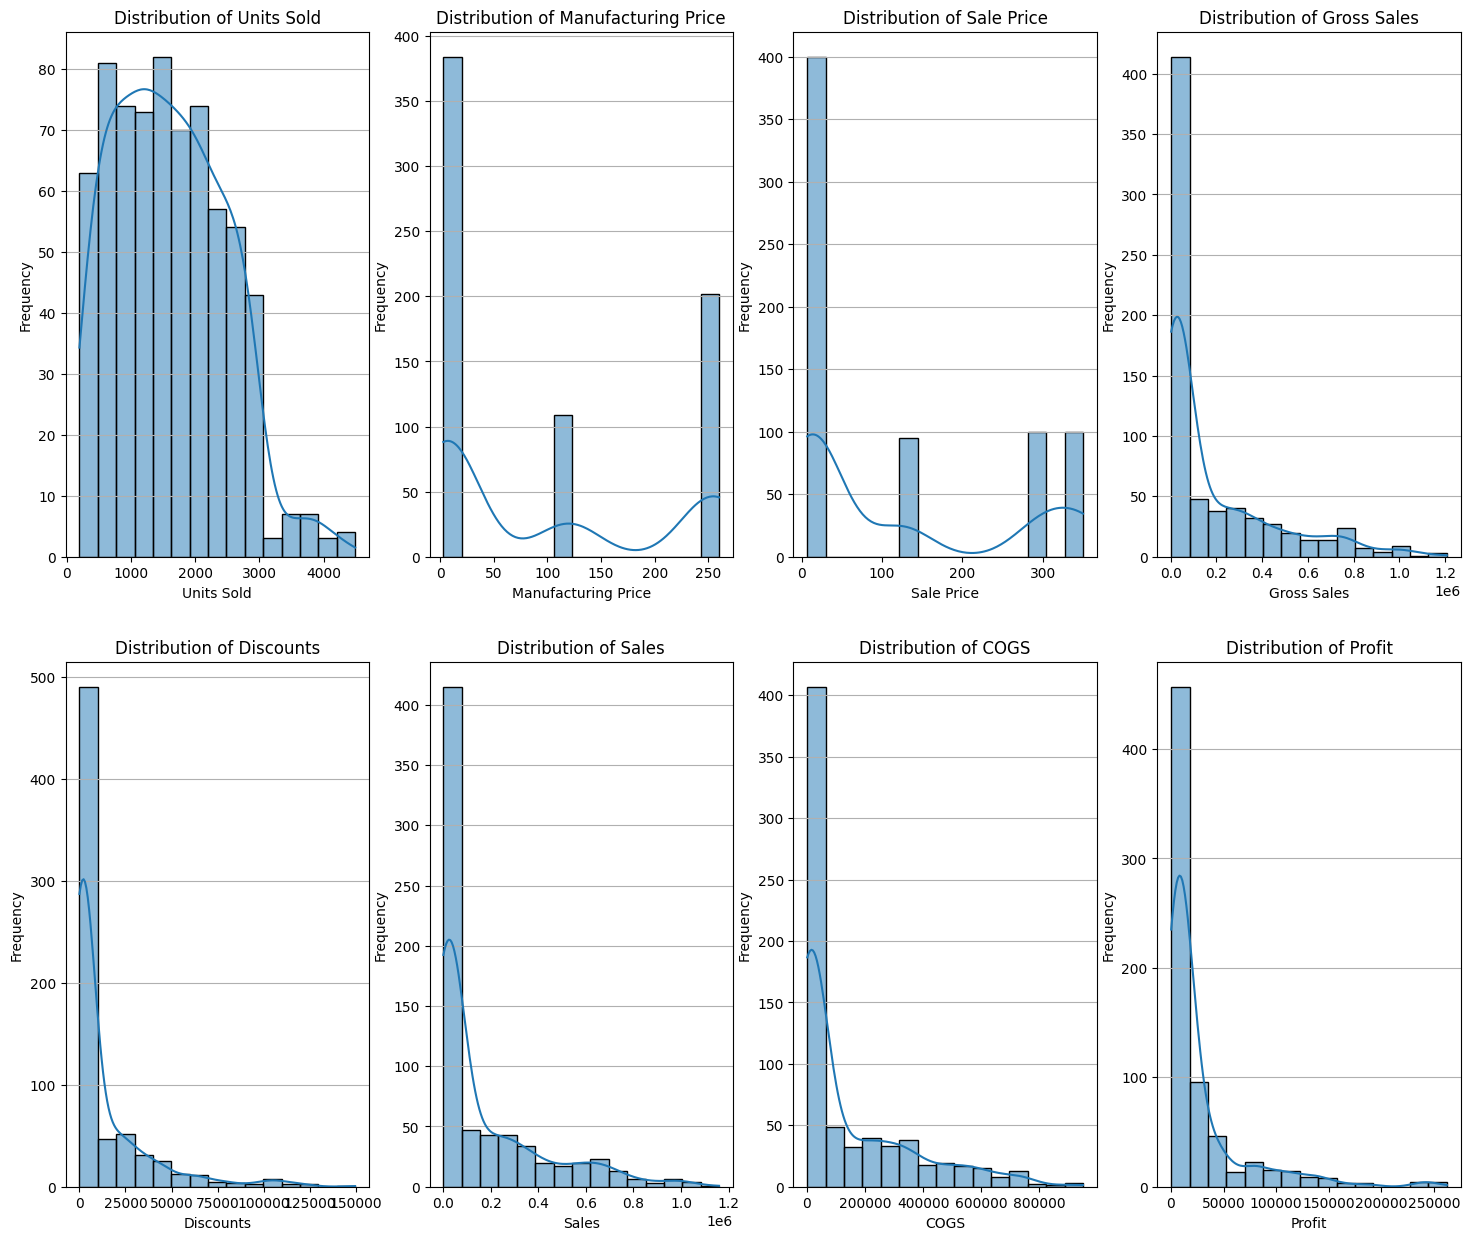

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.ravel()

# histogram and distribution of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=15, ax=axes[i])  # Specifica l'asse
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

# 5. Statistical analysis

sales trends over time using a line chart to highlight seasonality or trends

In [37]:
df.index = pd.to_datetime(df.index)

In [58]:
print(df.head())

               Segment  Country      Product Discount Band  Units Sold  \
Date                                                                     
2014-01-01  Government   Canada   Carretera          None         1618   
2014-01-01  Government  Germany   Carretera          None         1321   
2014-06-01   Midmarket   France   Carretera          None         2178   
2014-06-01   Midmarket  Germany   Carretera          None          888   
2014-06-01   Midmarket   Mexico   Carretera          None         2470   

            Manufacturing Price  Sale Price  Gross Sales  Discounts  Sales  \
Date                                                                         
2014-01-01                    3          20        32370          0  32370   
2014-01-01                    3          20        26420          0  26420   
2014-06-01                    3          15        32670          0  32670   
2014-06-01                    3          15        13320          0  13320   
2014-06-01   

In [38]:
monthly_sales = df.groupby(df.index.to_period('M'))['Sales'].sum()

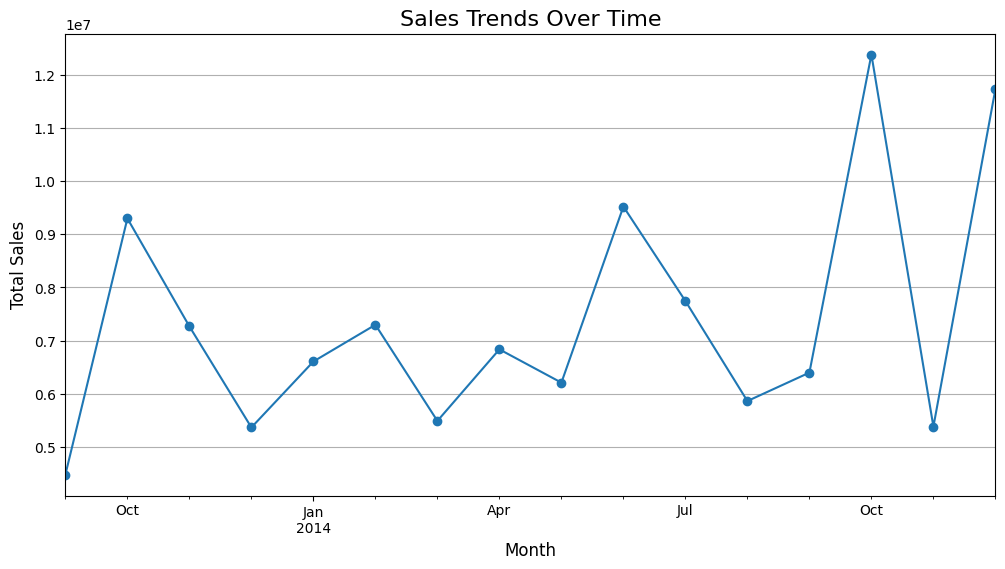

In [39]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Sales Trends Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(axis='y')
plt.show()

sales difference across regions using a heat map or bar chart

In [40]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values()

C:\Users\pzele\AppData\Local\Temp\ipykernel_25996\82983858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')


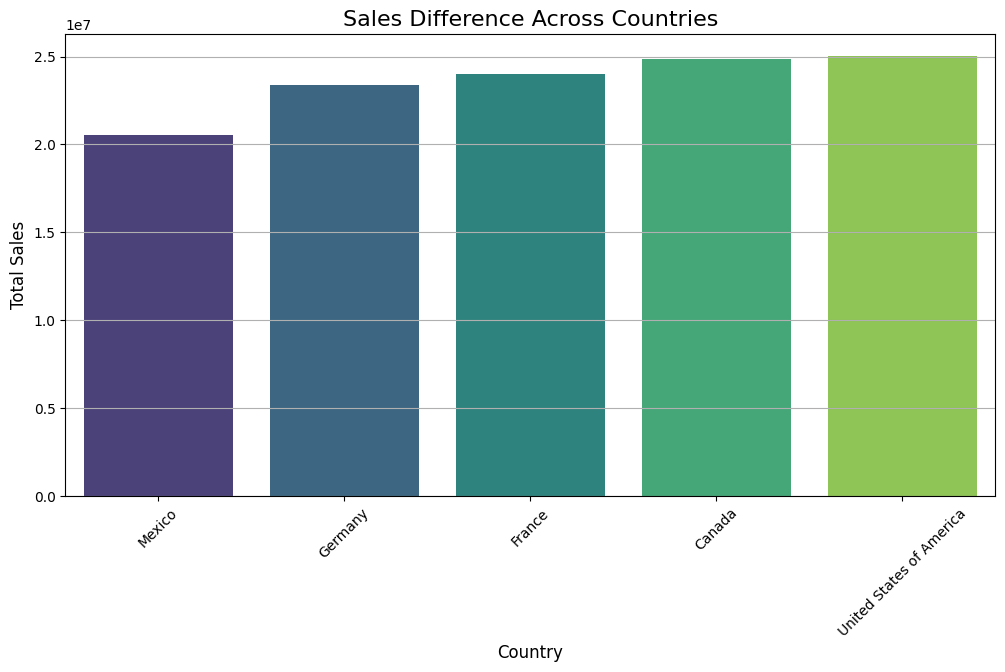

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title("Sales Difference Across Countries", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [42]:
regional_sales = df.groupby(['Country', 'Segment'])['Sales'].sum().unstack()

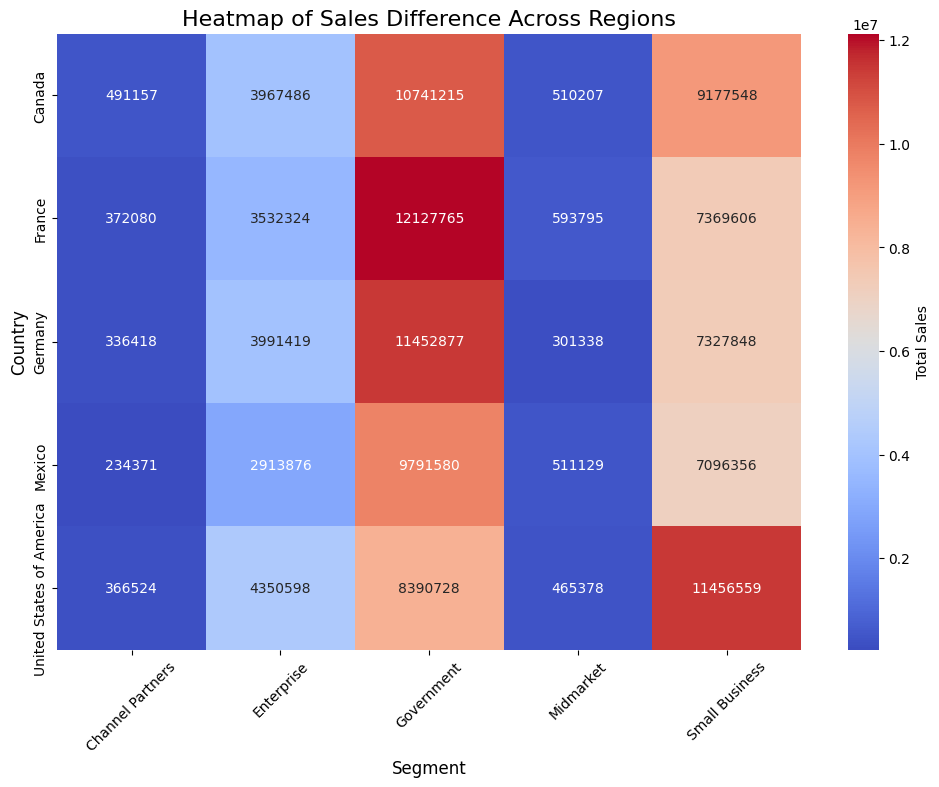

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(regional_sales, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Total Sales'})
plt.title("Heatmap of Sales Difference Across Regions", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.show()

top-selling products using visualization charts (pie chart or bar chart)

In [44]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

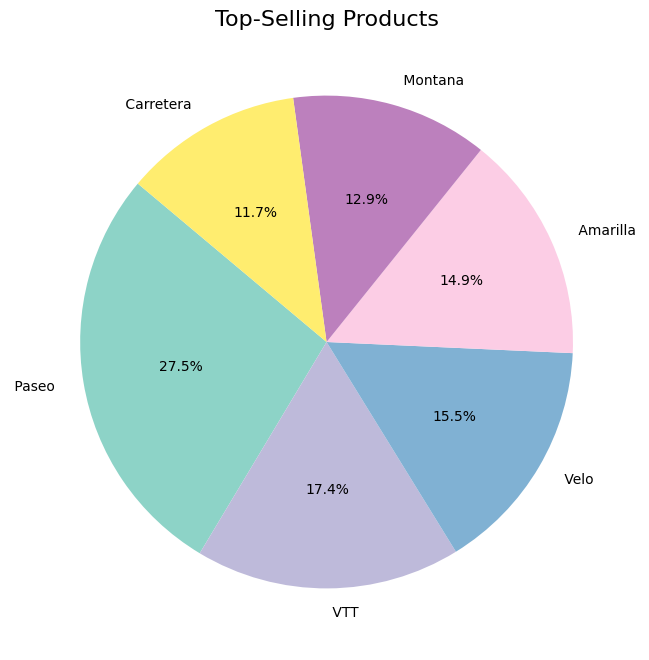

In [45]:
plt.figure(figsize=(8, 8))
product_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Top-Selling Products", fontsize=16)
plt.ylabel("")
plt.show()

relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression

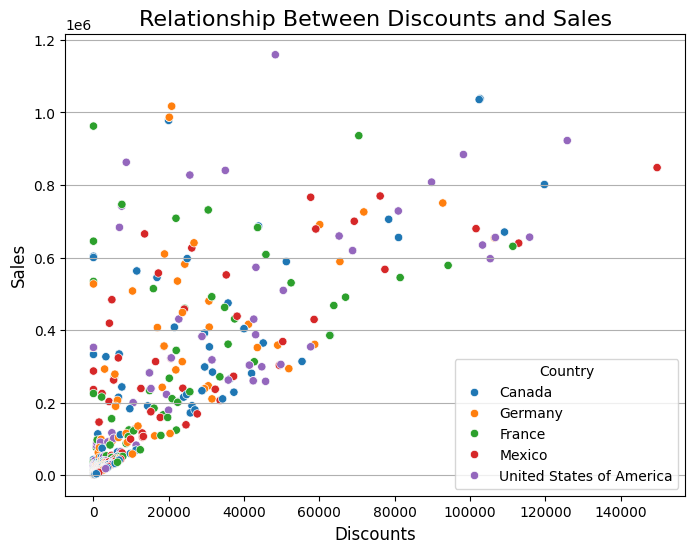

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discounts', y='Sales', data=df, hue='Country', palette='tab10')
plt.title("Relationship Between Discounts and Sales", fontsize=16)
plt.xlabel("Discounts", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(axis='y')
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
X = df[['Discounts']]
y = df['Sales']

In [49]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [50]:
df['Sales_Predicted'] = model.predict(X)

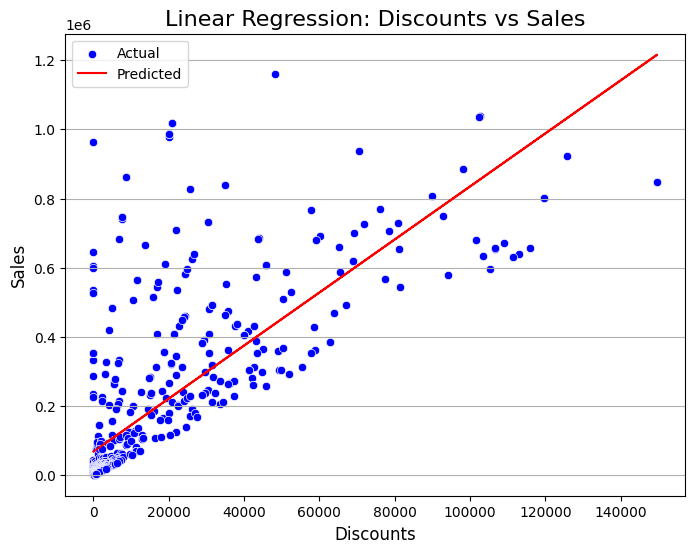

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discounts', y='Sales', data=df, label='Actual', color='blue')
plt.plot(df['Discounts'], df['Sales_Predicted'], color='red', label='Predicted')
plt.title("Linear Regression: Discounts vs Sales", fontsize=16)
plt.xlabel("Discounts", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.grid(axis='y')
plt.show()

In [52]:
import statsmodels.api as sm

In [53]:
X = sm.add_constant(X)

In [54]:
model = sm.OLS(y, X).fit()

In [55]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     857.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          2.70e-123
Time:                        18:43:22   Log-Likelihood:                -9308.3
No. Observations:                 695   AIC:                         1.862e+04
Df Residuals:                     693   BIC:                         1.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.847e+04   6945.279      9.859      0.0

### Correlation 

In [65]:
# Apply pd.get_dummies to create dummies for categorical columns
df_model = pd.get_dummies(df, columns=['Segment', 'Country', 'Product'], drop_first=True)

# Verify the new DataFrame with dummies
print(df_model.head())



           Discount Band  Units Sold  Manufacturing Price  Sale Price  \
Date                                                                    
2014-01-01         None         1618                    3          20   
2014-01-01         None         1321                    3          20   
2014-06-01         None         2178                    3          15   
2014-06-01         None          888                    3          15   
2014-06-01         None         2470                    3          15   

            Gross Sales  Discounts  Sales   COGS  Profit  Sales_Predicted  \
Date                                                                        
2014-01-01        32370          0  32370  16185   16185     68474.126031   
2014-01-01        26420          0  26420  13210   13210     68474.126031   
2014-06-01        32670          0  32670  21780   10890     68474.126031   
2014-06-01        13320          0  13320   8880    4440     68474.126031   
2014-06-01        37050   

In [74]:
df_model = df_model.replace({' None ': None}, regex=True)

print(df_model.head())

           Discount Band  Units Sold  Manufacturing Price  Sale Price  \
Date                                                                    
2014-01-01          None        1618                    3          20   
2014-01-01          None        1321                    3          20   
2014-06-01          None        2178                    3          15   
2014-06-01          None         888                    3          15   
2014-06-01          None        2470                    3          15   

            Gross Sales  Discounts  Sales   COGS  Profit  Sales_Predicted  \
Date                                                                        
2014-01-01        32370          0  32370  16185   16185     68474.126031   
2014-01-01        26420          0  26420  13210   13210     68474.126031   
2014-06-01        32670          0  32670  21780   10890     68474.126031   
2014-06-01        13320          0  13320   8880    4440     68474.126031   
2014-06-01        37050   

In [76]:
print(df_model.select_dtypes(include=['object']).head())


           Discount Band
Date                    
2014-01-01          None
2014-01-01          None
2014-06-01          None
2014-06-01          None
2014-06-01          None


In [77]:
print(df_model['Discount Band'].unique())


[None ' Low ' ' Medium ' ' High ']


In [78]:
df_model['Discount Band'] = df_model['Discount Band'].str.strip()


In [79]:
df_model = pd.get_dummies(df_model, columns=['Discount Band'], drop_first=True)
print(df_model.head())

            Units Sold  Manufacturing Price  Sale Price  Gross Sales  \
Date                                                                   
2014-01-01        1618                    3          20        32370   
2014-01-01        1321                    3          20        26420   
2014-06-01        2178                    3          15        32670   
2014-06-01         888                    3          15        13320   
2014-06-01        2470                    3          15        37050   

            Discounts  Sales   COGS  Profit  Sales_Predicted  \
Date                                                           
2014-01-01          0  32370  16185   16185     68474.126031   
2014-01-01          0  26420  13210   13210     68474.126031   
2014-06-01          0  32670  21780   10890     68474.126031   
2014-06-01          0  13320   8880    4440     68474.126031   
2014-06-01          0  37050  24700   12350     68474.126031   

            Segment_Enterprise  ...  Country_G

In [80]:
correlation_matrix = df_model.corr()

In [81]:
print(correlation_matrix.round(2))

                                  Units Sold  Manufacturing Price  Sale Price  \
Units Sold                              1.00                -0.03       -0.07   
Manufacturing Price                    -0.03                 1.00        0.07   
Sale Price                             -0.07                 0.07        1.00   
Gross Sales                             0.33                 0.05        0.81   
Discounts                               0.25                 0.02        0.64   
Sales                                   0.33                 0.05        0.81   
COGS                                    0.33                 0.05        0.80   
Profit                                  0.27                 0.07        0.68   
Sales_Predicted                         0.25                 0.02        0.64   
Segment_Enterprise                      0.04                 0.00        0.02   
Segment_Government                     -0.04                 0.00        0.05   
Segment_Midmarket           

In [89]:
# Visualize the correlation matrix
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",  # Format text with two decimal places
    color_continuous_scale="RdBu_r",  # Use a valid Plotly colorscale
    title="Correlation Matrix Heatmap",
    aspect="auto"  # Ensures the heatmap scales proportionally
)

# Adjust layout for better visualization
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=1000,  # Adjust width
    height=1000,  # Adjust height
)

# Show the heatmap
fig.show()


In [86]:
strong_correlation_matrix = correlation_matrix.where(abs(correlation_matrix) > 0.5, np.nan)

In [90]:
print(strong_correlation_matrix)

                                  Units Sold  Manufacturing Price  Sale Price  \
Units Sold                               1.0                  NaN         NaN   
Manufacturing Price                      NaN             1.000000         NaN   
Sale Price                               NaN                  NaN    1.000000   
Gross Sales                              NaN                  NaN    0.808701   
Discounts                                NaN                  NaN    0.642016   
Sales                                    NaN                  NaN    0.806346   
COGS                                     NaN                  NaN    0.799965   
Profit                                   NaN                  NaN    0.675231   
Sales_Predicted                          NaN                  NaN    0.642016   
Segment_Enterprise                       NaN                  NaN         NaN   
Segment_Government                       NaN                  NaN         NaN   
Segment_Midmarket           

In [88]:
# Visualize the filtered correlation matrix
fig = px.imshow(
    strong_correlation_matrix,
    text_auto=".2f",  # Display values with 2 decimal places
    color_continuous_scale="RdBu_r",  # Diverging color scale
    title="Strong Correlations (>|0.5|)",
    aspect="auto"  # Scale to fit matrix
)

# Adjust layout for better visualization
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=1000,
    height=1000,
)

# Show the heatmap
fig.show()

# 6. Conclusion